In [1]:
import pymc as pm
from mc import *
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
src = load_objectives(
    path_data='data/pars.json', 
    path_target='data/targets.json'
)

In [3]:
dm = pm.Model()
src.define_prior(dm)

with dm:
    pprior = pm.sample_prior_predictive(samples = 200)
    
pprior = prior_to_particles(pprior)
pprior = [src.serve(p) for p in pprior]

In [4]:
with open('data/test_priors.json', 'w') as f:
    json.dump(pprior, f)

In [5]:
model = src.build_model()

with model:
    pprior = pm.sample_prior_predictive(samples=50)

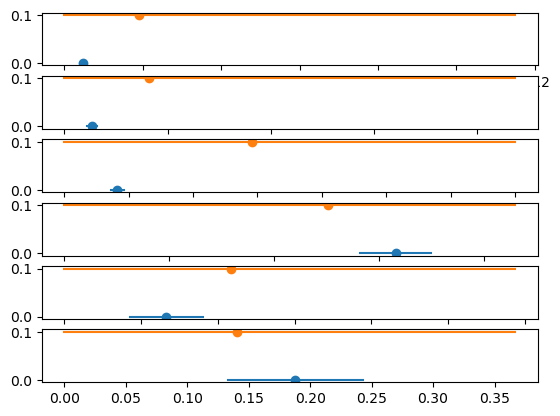

In [6]:
obs, eps = src.Obs, src.Eps

fig, ax = plt.subplots(nrows=len(obs))

m = np.mean(pprior.prior_predictive.sim.stack(samples=('chain', 'draw')), 1)
l = np.quantile(pprior.prior_predictive.sim.stack(samples=('chain', 'draw')), 0.025, 1)
u = np.quantile(pprior.prior_predictive.sim.stack(samples=('chain', 'draw')), 0.975, 1)

for i in range(len(obs)):
    ax[i].scatter(obs[i], 0)
    ax[i].plot([obs[i] - eps[i], obs[i] + eps[i]], [0, 0] )
    
    ax[i].scatter(m[i], 0.1)
    ax[i].plot([l[i], u[i]], [0.1, 0.1] )
